In [6]:
ano = 2024
caminho_dados_1 = f'/content/{ano}_Viagem.csv'
caminho_dados_2 = f'/content/{ano}_Passagem.csv'
caminho_saida_tabela = f'/content/tabela_{ano}.xlsx'
caminho_saida_grafico = f'/content/grafico_{ano}.png'

In [8]:
import pandas as pd

#Lendo os dados
df_viagens = pd.read_csv(caminho_dados_1, encoding = 'Windows-1252', sep = ';', decimal = ',')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#Criando nova coluna de despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

#Ajustando Valores Nulos Na Coluna De Cargos
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

#Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format = '%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format = '%d/%m/%Y')

#Criando novas colunas de data
df_viagens['Mês da Viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de Viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

In [9]:
#Criando tabela consolidada
df_viagens_consolidado = (
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media = ('Despesas', 'mean'),
        duracao_media = ('Dias de Viagem', 'mean'),
        despesa_maxima = ('Despesas', 'max'),
        despesa_minima = ('Despesas', 'min'),
        despesas_totais = ('Despesas', 'sum'),
        destino_mais_frequente = ('Destinos', pd.Series.mode),
        n_viagens= ('Nome', 'count'))
    .reset_index()
    .sort_values(by = 'despesas_totais', ascending = False))

#Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize = True).rename('Proporção de Viagens').reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['Proporção de Viagens'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

#Chegando na tabela final - consolidada e com filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by = 'n_viagens', ascending = False)

#Salvando a tabela final
df_final.to_excel(caminho_saida_tabela, index = False)

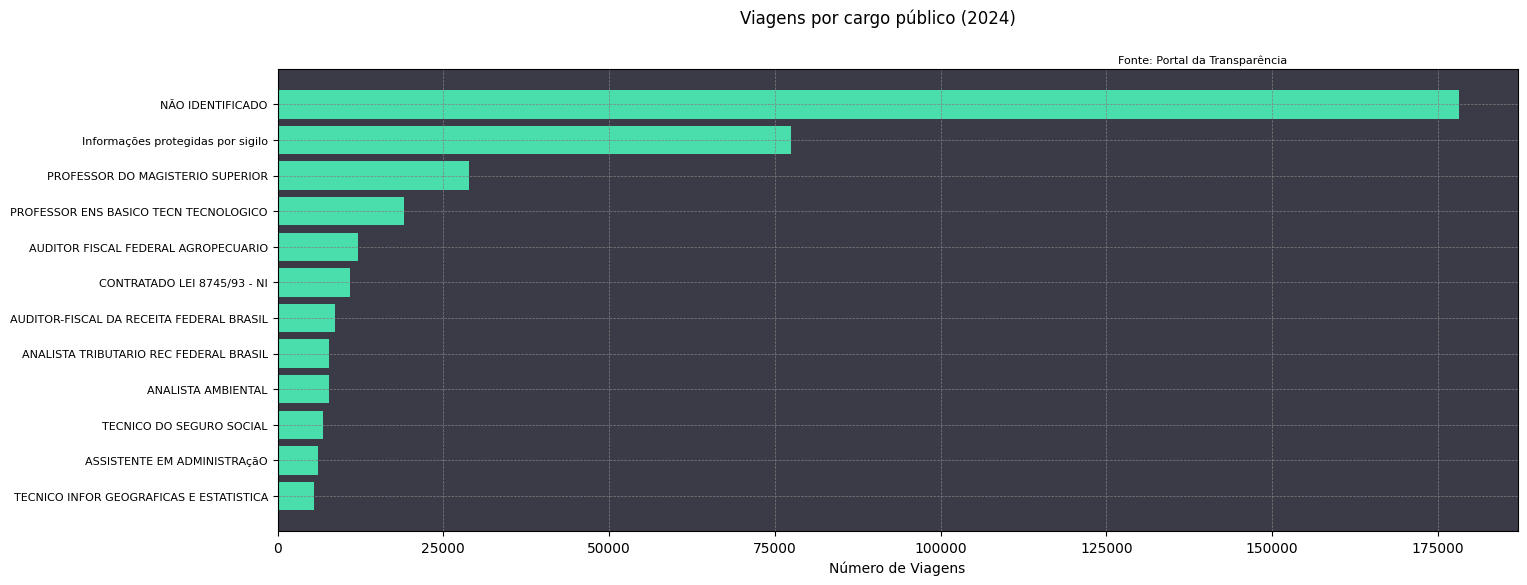

In [10]:
import matplotlib.pyplot as plt

#Criando a figura
fig, ax = plt.subplots(figsize = (16, 6)) #fig é a figura e ax é a região da figura, obs: as figuras podem ter mais de um ax, vou demonstrar na célula de código abaixo

#Plotando o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color = '#49deac')
ax.set_facecolor('#3b3b47')
ax.invert_yaxis() #Poderia inverver no pandas, sim, mas caso queira inverter aqui, também é possível

#Ajustando o gráfico
plt.grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
fig.suptitle('Viagens por cargo público (2024)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize = 8)
plt.xlabel('Número de Viagens')
plt.yticks(fontsize = 8)

#Salvando o gráfico
plt.savefig(caminho_saida_grafico, bbox_inches = 'tight')

#**Conclusões**


1.   *Nesta análise, podemos observar que o maior número de viagens ocorre por meio de cargos não identificados, seja devido à falta de informação, seja por conta de dados protegidos por sigilo.*
2.   *Os dois cargos citados acima representam aproximadamente 70,8% das viagens realizadas por servidores públicos até o final de setembro de 2024, enquanto os outros cargos que mais viajaram correspondem a apenas 29,2% das viagens.*
3.  *Na mesma linha dos cargos para os quais não temos informação exata sobre a atuação do profissional e que apresentam um número bem menor de viagens do que os dois citados acima, temos o cargo "CONTRATADO LEI 8745/93 - NI", que é um tipo de contratação temporária. Assim, ao adicionar este cargo aos outros dois mencionados anteriormente, temos um total de 72,2% de viagens realizadas por cargos para os quais não temos informações detalhadas e 27,8% para os cargos sobre os quais sabemos qual é e o motivo.*
4.  *Ou seja, a maior parte dos números de viagens não temos como identificar a quem pertencem ou por que foram feitas, então vamos focar as próximas conclusões nas que temos informação.*
5.  *Considerando agora apenas os 27,8%, conseguimos obter alguns valores. Mas, antes, vamos dividi-los em grupos:*
- *Grupo 1: Educação*
Professor do magistério superior
*Professor ensino básico tecn tecnológico
- *Grupo 2: Fiscalização e Tributação*
Auditor fiscal federal agropecuário
Auditor fiscal da Receita Federal do Brasil
Analista tributário da Receita Federal do Brasil
- *Grupo 3: Meio Ambiente*
Analista Ambiental
- *Grupo 4: Previdência Social*
Técnico do Seguro Social
- *Grupo 5: Administrativo*
Assistente em Administração
- *Grupo 6: Tecnologia da Informação e Estatística*
Técnico em Informações Geográficas e Estatística
6.  *Agora conseguimos obter alguns números para cada grupo:*
- *Grupo 1: Reponsável por 46,7% das viagens.*
- *Grupo 2: Reponsável por 27,8% das viagens.*
- *Grupo 3: Reponsável por 7,5% das viagens.*
- *Grupo 4: Reponsável por 6,6% das viagens.*
- *Grupo 5: Reponsável por 5,8% das viagens.*
- *Grupo 6: Reponsável por 5,3% das viagens.*
7.  *Com esses números, podemos observar a frequência de viagens para os cargos públicos cuja frequência de viagens tem alta relevância em meu conjunto de dados. A partir disso, podemos tomar algumas ações, como estudar a possibilidade de reduzir os gastos com viagens, diminuir a porcentagem, entre outras medidas. Em resumo, esses dados nos permitem explorar várias direções.*
8.  *Com base nos pontos citados acima, nas possíveis alterações que eu poderia fazer no DataFrame e nos novos gráficos que poderia gerar, seria possível extrair ainda mais insights. No entanto, optei por encerrar aqui, pois o objetivo deste notebook é demonstrar meu conhecimento em algumas das bibliotecas mais importantes para análise de dados em Python.*







#Aqui temos os códigos que foram criados durante minha análise. Caso queira ver todo o processo de construção, basta abrir esta célula.

OBS 1: Está um pouco bagunçado, porém tentei dividir por seções o que eu fui fazendo!

OBS 2: Tem alguns comandos ali que não fazem muito sentido se for focar na análise que eu estou fazendo, porém coloquei para mostrar bem meu conhecendo sobre a linguagem Python e a biblioteca Pandas

###Carregando os dados e conchendo os meus dados

In [ ]:
import pandas as pd

In [ ]:
df_viagens = pd.read_csv('/content/2024_Viagem.csv', encoding = 'Windows-1252', sep = ';')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_viagens

In [ ]:
df_viagens.info()

##Brincando um pouco com as colunas e tipos de dados

In [ ]:
df_viagens['Nome do órgão superior']

In [ ]:
df_viagens['Valor diárias']

In [ ]:
colunas = ['Nome do órgão superior', 'Valor diárias']
df_viagens[colunas]

In [ ]:
df_viagens[['Nome do órgão superior', 'Valor diárias']]

In [ ]:
df_viagens['Nome do órgão superior'].str.upper()

In [ ]:
df_viagens['Nome do órgão superior'].str.len()

In [ ]:
df_viagens['Nome do órgão superior'].str.upper().str.replace('MINISTÉRIO', 'MIN.')

In [ ]:
df_viagens[['Valor diárias', 'Valor passagens']]

In [ ]:
df_viagens['Valor diárias'].str.replace(',', '.').astype(float)

In [ ]:
df_viagens['Valor diárias'] = df_viagens['Valor diárias'].str.replace(',', '.').astype(float)

In [ ]:
df_viagens.info()

In [ ]:
df_viagens['Valor passagens'] = df_viagens['Valor passagens'].str.replace(',', '.').astype(float)
df_viagens['Valor devolução'] = df_viagens['Valor devolução'].str.replace(',', '.').astype(float)
df_viagens['Valor outros gastos'] = df_viagens['Valor outros gastos'].str.replace(',', '.').astype(float)

In [ ]:
df_viagens.info()

In [ ]:
df_viagens['Valor diárias'] + df_viagens['Valor passagens']

##Vendo a proporção de viagens e criando uma coluna para despesas

In [ ]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [ ]:
df_viagens

In [ ]:
(df_viagens['Cargo'].value_counts(normalize = True) * 100).rename('Proporção de Viagens').reset_index()

##Criando novas tabelas e agrupando alguns dados

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Deixando apenas com 2 casas decimais depois da virgula

df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Deixando apenas com 2 casas decimais depois da virgula

df_viagens.groupby('Cargo')['Despesas'].mean().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Deixando apenas com 2 casas decimais depois da virgula

df_viagens.groupby('Cargo')['Despesas'].max().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Deixando apenas com 2 casas decimais depois da virgula

df_viagens.groupby('Cargo')['Despesas'].min().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Deixando apenas com 2 casas decimais depois da virgula

df_viagens.groupby('Cargo')['Despesas'].first().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Deixando apenas com 2 casas decimais depois da virgula

df_viagens.groupby('Cargo')['Despesas'].last().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
viagens_por_cargo = (df_viagens['Cargo'].value_counts(normalize = True) * 100).rename('Proporção de Viagens').reset_index()

##Fazendo alguns filtros

In [ ]:
filtro_mais_de_1_pct = viagens_por_cargo['Proporção de Viagens'] > 1

In [ ]:
viagens_por_cargo

In [ ]:
viagens_por_cargo[filtro_mais_de_1_pct]

In [ ]:
filtro_eh_tecnico = viagens_por_cargo['Cargo'].str.startswith('TECNICO')

In [ ]:
viagens_por_cargo[filtro_eh_tecnico]

In [ ]:
viagens_por_cargo[filtro_eh_tecnico & filtro_mais_de_1_pct]

In [ ]:
viagens_por_cargo[filtro_eh_tecnico | filtro_mais_de_1_pct]

In [ ]:
gastos_totais_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values(by = 'Despesas', ascending = False)

In [ ]:
gastos_totais_por_cargo[gastos_totais_por_cargo['Despesas'] > 10_000_000]

In [ ]:
gastos_medio_por_cargo = df_viagens.groupby('Cargo')['Despesas'].mean().reset_index().sort_values(by = 'Despesas', ascending = False)
gastos_medio_por_cargo[gastos_medio_por_cargo['Despesas'] > 10_000]

##Lidando com dados nulos

In [ ]:
df_viagens['Cargo'].value_counts(normalize = True).sum()

In [ ]:
df_viagens['Cargo'].value_counts().sum() #Aqui vemos que temos muitos valores nulos, pois, muitos métodos do pandas excluem muitos valores nulos por padrão, ou seja, fazem as contas mesmo com valores nulos na coluna

In [ ]:
df_viagens['Cargo'].value_counts()

In [ ]:
df_viagens['Cargo'].value_counts(dropna = False)

In [ ]:
df_viagens

In [ ]:
df_viagens.dropna(subset = 'Cargo').reset_index() #Se não especificar por padrão o dropna remove todas as linhas que tenham valores nulos, indepemente da coluna(Campo) que este valor nulo esteja!

In [ ]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO') #Se eu não passar dessa forma que eu escrevi aqui, igual o dropna, ele iria preencher para todos os valores Nan`s de todas as colunas
df_viagens

##Trabalhando com as datas


In [ ]:
df_viagens[['Período - Data de início', 'Período - Data de fim']]

In [ ]:
df_viagens['Período - Data de início']

In [ ]:
pd.to_datetime(df_viagens['Período - Data de início'], format = '%d/%m/%Y')

In [ ]:
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format = '%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format = '%d/%m/%Y')

In [ ]:
df_viagens.info()

In [ ]:
df_viagens['Mês da Viagem'] = df_viagens['Período - Data de início'].dt.month_name()

In [ ]:
df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']

In [ ]:
(df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

In [ ]:
df_viagens['Dias de Viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

In [ ]:
df_viagens

##Agregando e filtrando dados

In [ ]:
df_viagens.groupby('Cargo').agg(despesa_media=('Despesas', 'mean'), duracao_media = ('Dias de Viagem', 'mean')).reset_index()

In [ ]:
(
  df_viagens
 .groupby('Cargo')
 .agg(
     despesa_media = ('Despesas', 'mean'),
     duracao_media = ('Dias de Viagem', 'mean'),
     despesa_maxima = ('Despesas', 'max'),
     despesa_minima = ('Despesas', 'min'),
     despesa_totais = ('Despesas', 'sum'),
     destino_mais_frequente = ('Destinos', pd.Series.mode),
     n_viagens= ('Nome', 'count') #Coloquei qualquer uma só para fazer a contagem de viagens, até porque esse é um DataFrame das viagens de servidores públicos!
     )
 .reset_index()
 )

In [ ]:
df_cargos = (df_viagens['Cargo'].value_counts(normalize = True) * 100).rename('Proporção de Viagens').reset_index()
df_cargos

In [ ]:
df_cargos.loc[df_cargos['Proporção de Viagens'] > 1, 'Cargo']

In [ ]:
df_viagens_consolidado = (
  df_viagens
 .groupby('Cargo')
 .agg(
     despesa_media = ('Despesas', 'mean'),
     duracao_media = ('Dias de Viagem', 'mean'),
     despesa_maxima = ('Despesas', 'max'),
     despesa_minima = ('Despesas', 'min'),
     despesa_totais = ('Despesas', 'sum'),
     destino_mais_frequente = ('Destinos', pd.Series.mode),
     n_viagens= ('Nome', 'count') #Coloquei qualquer uma só para fazer a contagem de viagens
     )
 .reset_index()
 )

In [ ]:
cargos_relevantes = df_cargos.loc[df_cargos['Proporção de Viagens'] > 1, 'Cargo']

In [ ]:
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes) #Quais dessa cargo dessa tabela grande estão em cargos_relevantes

In [ ]:
df_final = df_viagens_consolidado[filtro]

##Criando e customizando gráficos

In [ ]:
df_final

In [ ]:
df_final = df_final.sort_values(by = 'n_viagens', ascending = False)

In [ ]:
df_final.plot(x = 'Cargo', y = 'n_viagens', kind = 'barh');

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))

ax.barh(df_final['Cargo'], df_final['n_viagens'], color = '#49deac')
ax.set_facecolor('#3b3b47')
ax.invert_yaxis()
plt.grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
fig.suptitle('Viagens por cargo público (2024)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize = 8)
plt.xlabel('Número de Viagens')
plt.yticks(fontsize = 8)


plt.show()

In [ ]:
#Obs: Para deixar os gráficos todos ordenados eu teria que ir atualizando a váriavel df_final, como estou usando isso com proposito de exemplificar, não alterei!
fig, axs = plt.subplots(6, 1, figsize = (8, 46))
plt.figtext(0.2, 0.09, 'Fonte: Portal da Transparência', fontsize = 12)

axs[0].barh(df_final['Cargo'], df_final['n_viagens'], color = '#49deac')
axs[0].set_facecolor('#3b3b47')
axs[0].invert_yaxis()
axs[0].set_title('Número de viagens por cargo')
axs[0].grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
axs[0].set_xlabel('Número de Viagens')
axs[0].tick_params(axis='y', labelsize=8)

axs[1].barh(df_final['Cargo'], df_final['duracao_media'], color = '#49deac')
axs[1].set_facecolor('#3b3b47')
axs[1].invert_yaxis()
axs[1].set_title('Duração média das viagens por cargo')
axs[1].grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
axs[1].set_xlabel('Número De Dias')
axs[1].tick_params(axis='y', labelsize=8)

axs[2].barh(df_final['Cargo'], df_final['despesa_media'], color = '#49deac')
axs[2].set_facecolor('#3b3b47')
axs[2].invert_yaxis()
axs[2].set_title('Despesa média por cargo')
axs[2].grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
axs[2].set_xlabel('Valores Da Despesa Média (R$)')
axs[2].tick_params(axis='y', labelsize=8)

axs[3].barh(df_final['Cargo'], df_final['despesa_maxima'], color = '#49deac')
axs[3].set_facecolor('#3b3b47')
axs[3].invert_yaxis()
axs[3].set_title('Despesa máxima feita por cargo')
axs[3].grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
axs[3].set_xlabel('Valores Da Despesa Máxima (R$)')
axs[3].tick_params(axis='y', labelsize=8)

axs[4].barh(df_final['Cargo'], df_final['despesa_minima'], color = '#49deac')
axs[4].set_facecolor('#3b3b47')
axs[4].invert_yaxis()
axs[4].set_title('Despesa mínima feita por cargo')
axs[4].grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
axs[4].set_xlabel('Valores Da Despesa Mínima (R$)')
axs[4].tick_params(axis='y', labelsize=8)

axs[5].barh(df_final['Cargo'], df_final['despesa_totais'], color = '#49deac')
axs[5].set_facecolor('#3b3b47')
axs[5].invert_yaxis()
axs[5].set_title('Despesa totais feita por cargo')
axs[5].grid(color = 'Gray', linestyle = '--', linewidth = 0.5)
axs[5].set_xlabel('Valores Da Despesa Total (R$)')
axs[5].tick_params(axis='y', labelsize=8)



plt.show()

##Explorando mais ainda os dados e unidas dois dataframes diferentes

In [ ]:
df_viagens

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))

ax.scatter(df_viagens['Dias de Viagem'], df_viagens['Despesas'], alpha = 0.2)
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 25_000)



plt.show()

In [ ]:
(df_viagens['Despesas'] > 250_000).value_counts()

In [ ]:
filtro = df_viagens['Despesas'] > 250_000
df_viagens[filtro]

In [ ]:
caminho_dados_passagens = '/content/2024_Passagem.csv'

df_passagens = pd.read_csv(caminho_dados_passagens, encoding = 'Windows-1252', sep = ';', decimal = ',')
df_passagens

In [ ]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 19989596]

In [ ]:
df_viagens.merge(df_passagens)

In [ ]:
df_final['n_viagens']

In [ ]:
df_final['n_viagens'].sum()